In [2]:
import os
import pandas as pd
import pickle

def describe_files(directory):
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)
        
        if os.path.isfile(file_path):
            if file_name.endswith(".csv"):
                try:
                    df = pd.read_csv(file_path)
                    print(f"CSV File: {file_name}:")
                    display(df)
                except Exception as e:
                    print(f"Could not read CSV file {file_name}: {e}")
            elif file_name.endswith(".pkl"):
                try:
                    with open(file_path, 'rb') as f:
                        obj = pickle.load(f)
                    print(f"PKL File: {file_name}\nObject type: {type(obj)}\nStructure: {repr(obj)[:500]}\n")
                except Exception as e:
                    print(f"Could not read PKL file {file_name}: {e}")
            else:
                print(f"Other File: {file_name}")

# Example usage
data_path = r"C:\Users\gac8\PycharmProjects\PS-descriptors-LCS\CollaborationMarch\FromTheirData\data\20"
describe_files(data_path)

PKL File: cluster_IDs_20_kmeans.pkl
Object type: <class 'numpy.ndarray'>
Structure: array([11, 19, 16, ...,  4,  0,  0])

CSV File: fitness_20_kmeans.csv:


,9.999217987060546875e-01,1.915219705551862717e-03,9.456475257873535156e+00
0,0.999995,2.032342e-05,12.269711
1,0.750442,8.203942e-07,1.100971
2,0.993796,2.603802e-06,5.076380
3,0.994885,7.907200e-05,5.270444
4,0.999995,3.396502e-02,12.143908
...,...,...,...
52620,0.991082,1.212111e-04,4.710752
52621,0.975737,4.922443e-05,3.694229
52622,0.998943,8.524968e-04,6.851589
52623,0.999159,1.949709e-03,7.080057


CSV File: many_hot_vectors_20_kmeans.csv:


,0,1,1.1,0.1,1.2,0.2,0.3,0.4,1.3,0.5,0.6,0.7,0.8,0.9,0.10,0.11,1.4,0.12,0.13,0.14
0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1
1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,1,0,1,1
3,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52620,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52621,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
52622,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
52623,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


# My understanding

* the fitness file contains 3 columns each represents a fitness metric. Note that there is no header
* many_hot_vectors is the table where each row is a binary vector... 
* cluster_IDs is a numpy array.. but of what?


In [3]:
import numpy as np
cluster_ids_path = r"C:\Users\gac8\PycharmProjects\PS-descriptors-LCS\CollaborationMarch\FromTheirData\data\20\cluster_IDs_20_kmeans.pkl"

with open(cluster_ids_path, 'rb') as f:
    contents = np.load(cluster_ids_path, allow_pickle=True)
    table = pd.DataFrame(contents)
    
display(table)






,0
0,11
1,19
2,16
3,16
4,16
...,...
91594,4
91595,4
91596,4
91597,0


loading the fitness data......Finished (took 0.284831 seconds)
Convert to DataFrame for easier handling......Finished (took 0.000000 seconds)
Pairplot: Scatterplots for each combination of columns...

C:\Users\gac8\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


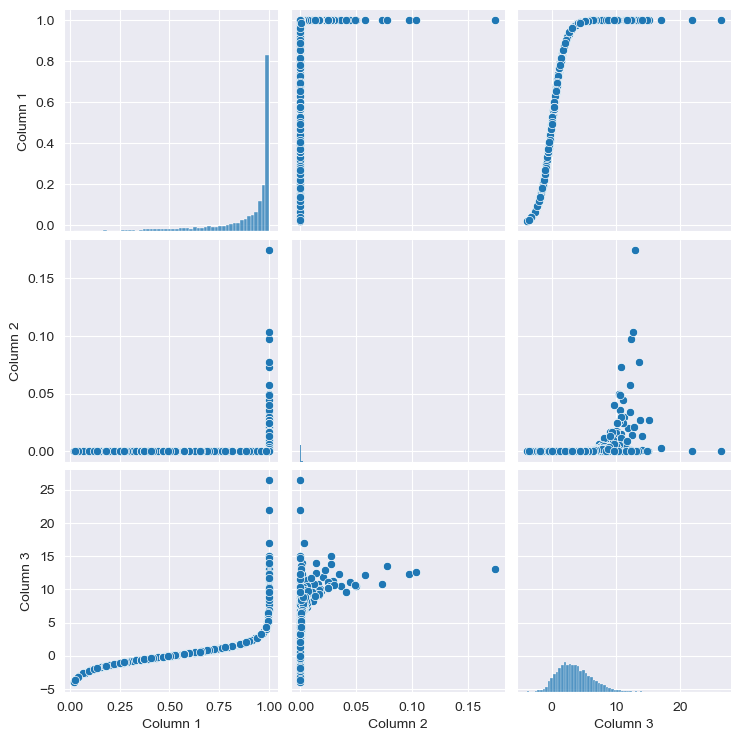

...Finished (took 25.477397 seconds)
Getting the correlations and putting them in a plot...

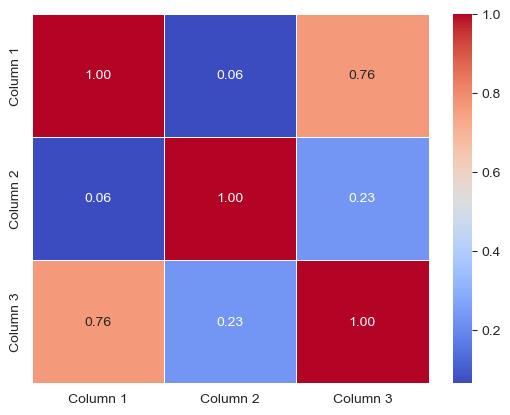

...Finished (took 0.315797 seconds)


In [4]:

import utils
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with utils.announce("loading the fitness data"):
    fitnesses_path = r"C:\Users\gac8\PycharmProjects\PS-descriptors-LCS\CollaborationMarch\FromTheirData\data\20\fitness_20_kmeans.csv"
    fitness_arrays = np.genfromtxt(fitnesses_path, delimiter=",", dtype=float)



with utils.announce("Convert to DataFrame for easier handling"):
    df = pd.DataFrame(fitness_arrays, columns=["Column 1", "Column 2", "Column 3"])

with utils.announce("Pairplot: Scatterplots for each combination of columns"):
    df_sample = df.sample(n=5000, random_state=42)  # Sample 5000 rows
    sns.pairplot(df_sample)
    plt.show()

with utils.announce("Getting the correlations and putting them in a plot"):
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.show()


In [5]:
from Core.SearchSpace import SearchSpace
import numpy as np
from Core.PRef import PRef


def get_pRef_from_vectors(name_of_vectors_file: str, name_of_fitness_file: str, column_in_fitness_file: int) -> PRef:
    full_solution_matrix = np.loadtxt(name_of_vectors_file, delimiter=",", dtype=int)
    fitness_array = np.genfromtxt(name_of_fitness_file, delimiter=",", dtype=float, usecols=column_in_fitness_file)
    display(full_solution_matrix)
    search_space = SearchSpace(2 for _ in range(full_solution_matrix.shape[1]))
    return PRef(full_solution_matrix=full_solution_matrix,
                fitness_array=fitness_array,
                search_space=search_space)

def get_vectors_file_name(size: int):
    return r"C:\Users\gac8\PycharmProjects\PS-descriptors-LCS\CollaborationMarch\FromTheirData\data" +f"\\{size}\\" + f"\\many_hot_vectors_{size}_kmeans.csv"


def get_fitness_file_name(size: int):
    return r"C:\Users\gac8\PycharmProjects\PS-descriptors-LCS\CollaborationMarch\FromTheirData\data" + f"\\{size}\\" + f"\\fitness_{size}_kmeans.csv"



In [6]:
size = 20
fitness_column_to_use = 0


pRef = get_pRef_from_vectors(name_of_vectors_file=get_vectors_file_name(size),
                             name_of_fitness_file=get_fitness_file_name(size),
                             column_in_fitness_file=fitness_column_to_use)
best_solution = pRef.get_best_solution()

print(pRef)

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

PRef with 52626 samples, mean = 0.88


# Default search method

Here, a solution `00010001011111` can have PS get `00*****10**111`

In [7]:
from SimplifiedSystem.search_methods import search_local_ps
from utils import announce
from SimplifiedSystem.PSSearchSettings import get_default_search_settings


found_pss = []
quantity_desired = 1

go_ahead = True
if go_ahead:
    search_settings = get_default_search_settings()
    search_settings.ps_search_budget=5000
    search_settings.metrics = "simplicity variance estimated_atomicity"
    search_settings.culling_method = "biggest"
    search_settings.verbose = True
    for iteration in range(quantity_desired):
        with announce("Searcing for a PS locally"):
            new_pss = search_local_ps(solution_to_explain=best_solution,
                                      search_settings=search_settings,
                                      backgroundInformation=pRef,
                                      to_avoid = found_pss)
            new_pss.sort(key=lambda ps: ps.metric_scores[2])
            print(f"Found the following pss:")
            for ps in new_pss:
                print(f"\t{ps}, scores = {ps.metric_scores}")
        found_pss.append(new_pss[0])
    
    
    print("At the end, the following PSs were found")
    for ps in found_pss:
        print(f"\t{ps}")


Searcing for a PS locally...==========================================================================================
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       62 |      4 |  0.000000E+00 |  0.0080645161 |             - |             -
     2 |      162 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0903163837 |             f
     3 |      262 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0598905124 |         ideal
     4 |      362 |      5 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     5 |      462 |      5 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     6 |      562 |      5 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     7 |      662 |      5 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     8 |      762 |      5 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     9 |      862 |      7 |  0.000000E+00 |  0.000000E+00 |  

# Limited search method

Here, a solution `00010001011111` can have PS get `********1**111`

In [8]:
from rearrange_linkage_table import clean_table
from Core.PS import PS
from SimplifiedSystem.ps_search_utils import get_metric_function
from Core.PSMetric.Simplicity import Simplicity


# this section will generate the search objectives

simplicity = get_metric_function("simplicity")
variance = get_metric_function("mean_fitness", pRef=pRef)
atomicity_evaluator, atomicity = get_metric_function("estimated_atomicity&evaluator", solution=best_solution, pRef = pRef)


ps = PS.from_string("1111"+"*"*(size-4))

print(f"{simplicity(ps) =}, {variance(ps) =}, {atomicity(ps) =}")

import numpy as np
import matplotlib.pyplot as plt
# Display the matrix using a colormap

def display_table_with_colours(table):
    # Display the matrix using a colormap
    plt.imshow(table, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()  # Add a color scale
    plt.show()

print("Showing the linkage table")
display_table_with_colours(atomicity_evaluator.linkage_table)

print("Showing the linkage table, rearranged")
display_table_with_colours(clean_table(atomicity_evaluator.linkage_table))


ModuleNotFoundError: No module named 'CollaborationMarch'

In [ ]:
from PolishSystem.polish_search_methods import search_local_polish_ps
from SimplifiedSystem.search_methods import search_local_ps
from utils import announce
from SimplifiedSystem.PSSearchSettings import get_default_search_settings

found_pss = []
quantity_desired = 5


search_settings = get_default_search_settings()
search_settings.ps_search_budget=5000
search_settings.metrics = "simplicity variance estimated_atomicity"
search_settings.culling_method = "biggest"
search_settings.verbose = True
for iteration in range(quantity_desired):
    with announce("Searcing for a PS locally"):
        new_pss = search_local_polish_ps(solution_to_explain=best_solution,
                                  search_settings=search_settings,
                                  to_avoid = found_pss,
                                         objectives = [simplicity, variance, atomicity])
        new_pss.sort(key=lambda ps: ps.metric_scores[2])
        print(f"Found the following pss:")
        for ps in new_pss:
            print(f"\t{ps}, scores = {ps.metric_scores}")
    found_pss.append(new_pss[0])


print("At the end, the following PSs were found")
for ps in found_pss:
    print(f"\t{ps}")
    